In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from functools import reduce

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


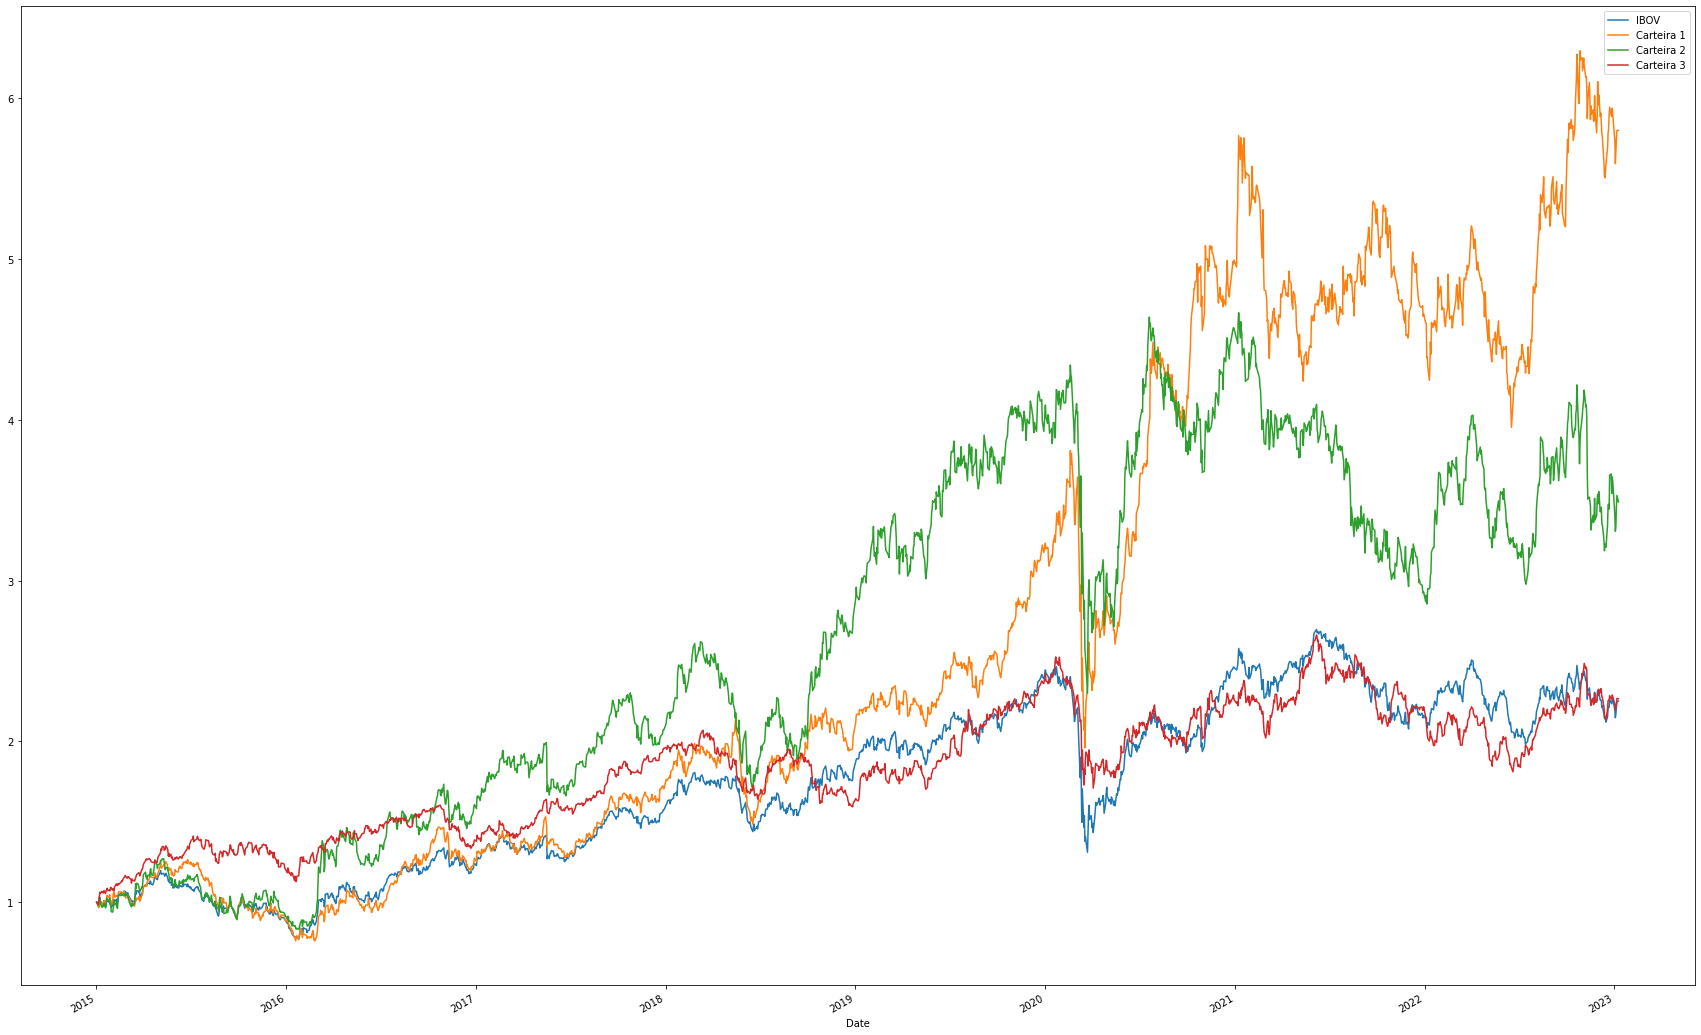

In [20]:

# datas de início e fim para coleta de dados no formato YYYY-MM-DD
start = '2015-01-01'
end = '2023-01-10'

# carteira 1
assets1 = ['ITUB4.SA', 'WEGE3.SA', 'PETR4.SA'] # ativos da carteira 1
prices1 = yf.download(assets1, start, end)['Adj Close'] # coletando dados do yahoo finance
buys1 = {'ITUB4.SA': 2000, 'WEGE3.SA': 5000, 'PETR4.SA': 3000} # valores em R$ que será investido em cada ativo
buys_df1 = pd.Series(data = buys1, index = list(buys1.keys())) # transformando em data frame do pandas
p1 = prices1*buys_df1/(prices1.iloc[0]) # multiplicando valores investidos pela cotação diária
p1['Carteira 1'] = p1.sum(axis = 1) # valor de mercado total da carteira 1

# carteira 2
assets2 = ['B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA'] # ativos da carteira 2
prices2 = yf.download(assets2, start, end)['Adj Close'] # coletando dados do yahoo finance
buys2 = {'B3SA3.SA': 4000, 'BBAS3.SA': 5000, 'BBDC3.SA': 1000} # valores em R$ que será investido em cada ativo
buys_df2 = pd.Series(data = buys2, index = list(buys2.keys())) # transformando em data frame do pandas
p2 = prices2*buys_df2/(prices2.iloc[0]) # multiplicando valores investidos pela cotação diária
p2['Carteira 2'] = p2.sum(axis = 1) # valor de mercado total da carteira 2

# carteira 3
assets3 = ['ABEV3.SA', 'PSSA3.SA', 'RADL3.SA'] # ativos da carteira 3
prices3 = yf.download(assets3, start, end)['Adj Close'] # coletando dados do yahoo finance
buys3 = {'ABEV3.SA': 6000, 'PSSA3.SA': 2000, 'RADL3.SA': 2000} # valores em R$ que será investido em cada ativo
buys_df3 = pd.Series(data = buys3, index = list(buys3.keys())) # transformando em data frame do pandas
p3 = prices3*buys_df3/(prices3.iloc[0]) # multiplicando valores investidos pela cotação diária
p3['Carteira 3'] = p3.sum(axis = 1) # valor de mercado total da carteira 3

# ibovespa
ibov = yf.download('^BVSP', start, end)
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace=True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

# array com todos data frames
dfs = [p1, p2, p3, ibov]

# resultado final
result = reduce(lambda left, right: pd.merge(left, right, on = 'Date'), dfs) # usando reduce para juntar todos os data frames e compará-los
final_result = result/result.iloc[0] # normalizando o data frame
final_result[['IBOV', 'Carteira 1', 'Carteira 2', 'Carteira 3']].plot(figsize = (30, 20)) # criando gráfico usando matplotlib